In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

In [6]:
import warnings                                                # eskime ve özellik uyarılarını görmemek için !
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# LOJİSTİK REGRESYON

# şeker hastalığı tahmini

In [7]:
df=pd.read_csv("diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
y=df["Outcome"] #bagımlı degiskenimiz y ye atıyoruz

In [11]:
X=df.drop(["Outcome"],axis=1)  #bagımlı degiskenin dısında kalan degiskenleri(bagımsız degiskenleri) X e atıyoruz

In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
loj_model=LogisticRegression(solver="liblinear").fit(X,y)

In [15]:
y_pred=loj_model.predict(X)

In [16]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [17]:
accuracy_score(y,y_pred)

0.7747395833333334

In [18]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
loj_model.predict_proba(X)[0:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

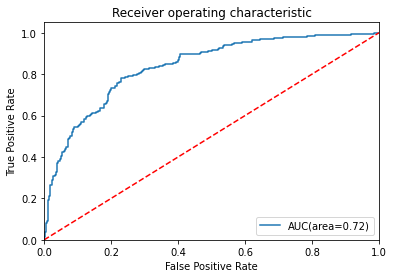

In [20]:
logit_roc_auc=roc_auc_score(y,loj_model.predict(X))
fpr,tpr,thresholds=roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC(area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

# Model Tuning(dogrulama)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.30,
                                              random_state=42)

In [22]:
loj_model=LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [23]:
y_pred=loj_model.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_pred))  # test seti hatasını buluyoruz

0.7532467532467533


In [25]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7704710144927536

# K EN YAKIN KOMSU (KNN)

In [26]:
knn_model=KNeighborsClassifier().fit(X_train,y_train)

In [27]:
y_pred=knn_model.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning

In [30]:
knn_params={"n_neighbors":np.arange(1,30)}

In [31]:
knn_cv_model=GridSearchCV(knn_model,knn_params,cv=10).fit(X_train,y_train)

In [32]:
knn_cv_model.best_score_

0.748637316561845

In [33]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [34]:
# final model

In [35]:
knn_tuned=KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)

In [36]:
y_pred=knn_tuned.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred) # aynı    # NOT: regresyon probleminde degerin daha küçük çıkmasını istiyorduk fakat 
                                       #sınıflandırma problemlerinde tuned edilmiş halinin daha yüksek çıkmasını istiyoruz

0.7316017316017316

In [38]:
knn_tuned.score(X_test,y_test) # aynı

0.7316017316017316

# DESTEK VEKTÖR MAKİNELERİ

# Model & Tahmin

In [39]:
svm_model=SVC(kernel="linear").fit(X_train,y_train)

In [40]:
?svm_model

Type:        SVC
String form: SVC(kernel='linear')
File:        c:\users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\svm\_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, default=1.0
    Regularization parameter. The stre

In [41]:
y_pred=svm_model.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# Model Tuning

In [43]:
svm=SVC().fit(X_train,y_train)

In [44]:
svm_params={"C":np.arange(1,3),
            "kernel":["linear","rbf"]}

In [45]:
svm_cv_model=GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [46]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [47]:
# final model

In [48]:
svm_tuned=SVC(C=2,kernel="linear").fit(X_train,y_train)

In [51]:
y_pred=svm_tuned.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# YAPAY SİNİR AĞLARI (ÇOK KATMANLI ALGILAYICILAR)

In [92]:
# standartlastırma

In [95]:
scaler=StandardScaler()

In [96]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [97]:
scaler.fit(X_test)
X_test=scaler.transform(X_test)

# Model & Tahmin

In [98]:
mlpc_model=MLPClassifier().fit(X_train,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [99]:
y_pred=mlpc_model.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred)

0.7316017316017316

# Model Tuning

In [101]:
mlpc_params={"alpha":[0.1,0.01,2],
             "hidden_layer_sizes":[(10,10),(100,100,100),(3,5)] #gizli katman sayısını veriyoruz, örneğin (10,10) demek 2 katmandan oluşsun
                                                           #ve her katmanda 10 nöron olsun
            }

In [102]:
mlpc=MLPClassifier(solver= "lbfgs")

In [103]:
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [104]:
mlpc_cv_model

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs'), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 2],
                         'hidden_layer_sizes': [(10, 10), (100, 100, 100),
                                                (3, 5)]},
             verbose=2)

In [105]:
mlpc_cv_model.best_params_

{'alpha': 2, 'hidden_layer_sizes': (3, 5)}

In [106]:
# final model

In [107]:
mlpc_tuned=MLPClassifier(solver= "lbfgs",alpha=2,hidden_layer_sizes=(3,5)).fit(X_train,y_train)

In [108]:
y_pred=mlpc_tuned.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [110]:
#activation fonksiyonunu logistic olarak denedik  (sınıflandırma prob=logstic,dogrusal prob=Relu)

In [111]:
mlpc=MLPClassifier(activation= "logistic")

In [112]:
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [113]:
mlpc_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100)}

In [114]:
mlpc_tuned=MLPClassifier(solver= "lbfgs",activation="logistic",alpha=0.01,hidden_layer_sizes=(100,100,100)).fit(X_train,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [115]:
y_pred=mlpc_tuned.predict(X_test)

In [116]:
accuracy_score(y_test,y_pred)

0.683982683982684